# Optiver Ants Question
This notebook goes over and answers the puzzle for job applications at Optiver.

My approach to this problem was to create one main class called `AntFindsFood` which is used as a parent class by a child class for each one of the three questions. The `boundary_condition` of the parent class has been left as an abstract method and will be overwritten by the child class.

These types of problems are similar to what I encountered during my master in TU Delft.

### Question:
An ant leaves its anthill in order to forage for food. It moves with the speed of 10cm per second, but it doesn't know where to go, therefore every second it moves randomly 10cm directly north, south, east or west with equal probability.

1. If the food is located on east-west lines 20cm to the north and 20cm to the south, as well as on north-south lines 20cm to the east and 20cm to the west from the anthill, how long will it take the ant to reach it on average?
2. What is the average time the ant will reach food if it is located only on a diagonal line passing through (10cm, 0cm) and (0cm, 10cm) points?
3. Can you write a program that comes up with an estimate of average time to find food for any closed boundary around the anthill? What would be the answer if food is located outside an defined by ( (x – 2.5cm) / 30cm )2 + ( (y – 2.5cm) / 40cm )2 < 1 in coordinate system where the anthill is located at (x = 0cm, y = 0cm)? Provide us with a solution rounded to the nearest integer.

In [1]:
import numpy as np
from abc import ABC, abstractmethod
import matplotlib.pyplot as plt

In [2]:
class AntFindsFood(ABC):
    def __init__(self, ants_num: int = 10_000, x_0: int = 0, y_0: int = 0, ant_speed: int = 10):
        self.x_0 = x_0
        self.y_0 = y_0
        self.ants_num = ants_num
        self.ant_speed = ant_speed
        
        self.time_array = np.zeros(self.ants_num)
        self.space_array = np.zeros((self.ants_num, 2))
        
        self.ants_reached = [0]

    def get_random_walk_direction(self):
        directions = np.random.randint(0, 4, self.ants_num)

        north = np.where(directions == 0)
        self.space_array[north, 0] += self.ant_speed

        east = np.where(directions == 1)
        self.space_array[east, 1] += self.ant_speed

        south = np.where(directions == 2)
        self.space_array[south, 0] -= self.ant_speed

        west = np.where(directions == 3)
        self.space_array[west, 1] -= self.ant_speed

    def update_time(self):
        self.time_array[~np.isnan(self.space_array[:, 0])] += 1

    @abstractmethod
    def boundary_condition(self):
        pass

    def step(self):
        self.get_random_walk_direction()
        self.update_time()
        self.boundary_condition()
        self.ants_reached.append(len(np.where(np.isnan(ants.space_array[:, 0]) == True)[0]))

# Answer to Question 1

In [3]:
class AntsQuestion1(AntFindsFood, ABC):
    def __init__(self):
        super().__init__()

    def boundary_condition(self):
        reached = np.where(np.any(((self.space_array >= 20) | (self.space_array <= -20)), axis=1))
        self.space_array[reached] = np.nan


if __name__ == '__main__':
    ants = AntsQuestion1()
    steps = 100
    for i in range(steps):
        ants.step()

    mean_time = ants.time_array.mean()
    print(f'The average time for the ants to reach the food is: {mean_time:.2f}s')

The average time for the ants to reach the food is: 4.50s


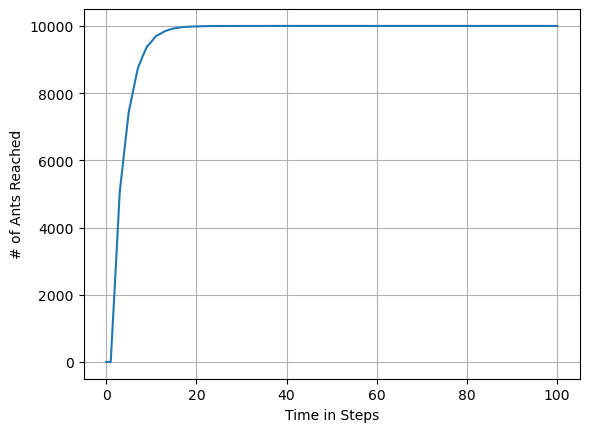

In [4]:
plt.plot(ants.ants_reached);
plt.xlabel('Time in Steps')
plt.ylabel('# of Ants Reached')
plt.grid()
plt.show()

# Answer to Question 2

In [5]:
class AntsQuestion2(AntFindsFood, ABC):
    def __init__(self, ants_num):
        super().__init__(ants_num=ants_num)

    def boundary_condition(self):
        reached = self.space_array[:, 1] >= 10 - self.space_array[:, 0]
        self.space_array[reached] = np.nan


if __name__ == '__main__':
    steps = 100
    number_of_ants = 10_000
    ants = AntsQuestion2(ants_num=number_of_ants)
    for i in range(steps):
        ants.step()

    mean_time = ants.time_array.mean()
    print(f'The average time for the ants to reach the food is: {mean_time:.2f}s')

The average time for the ants to reach the food is: 15.21s


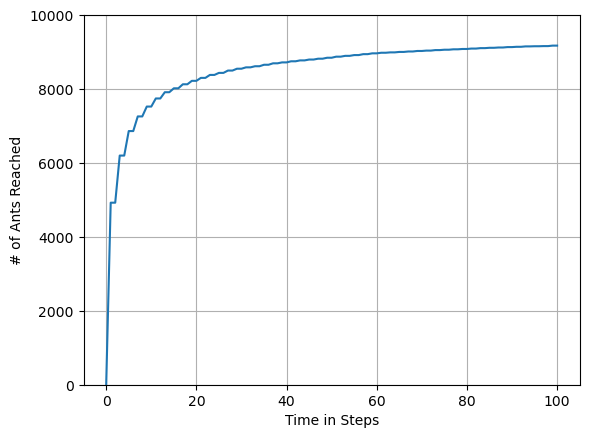

In [6]:
plt.plot(ants.ants_reached);
plt.xlabel('Time in Steps')
plt.ylabel('# of Ants Reached')
plt.grid()
plt.ylim([0, number_of_ants])
plt.show()

Another way to approach this, which might be better suited for what the exact outcome is you want, is to check the time when a certain percentage of ants has reached the food.

In [7]:
if __name__ == '__main__':

    ants_reached = 0
    number_of_ants = 100_000
    percentage_required = 0.95
    
    ants = AntsQuestion2(ants_num=number_of_ants)
    
    while ants_reached < percentage_required * number_of_ants:
        ants.step()
        ants_reached = len(np.where(np.isnan(ants.space_array[:, 0]) == True)[0])

    mean_time = ants.time_array.mean()
    print(f'The average time for the ants to reach the food is: {mean_time:.2f}s')

The average time for the ants to reach the food is: 24.08s


This shows that 95% of the ants make it in around 25 seconds.

# Answer to Question 3

In [8]:
class AntsQuestion3(AntFindsFood, ABC):
    def __init__(self, ants_num):
        super().__init__(ants_num=ants_num)

    def boundary_condition(self):
        x = self.space_array[:, 0]
        y = self.space_array[:, 1]
        reached = ((x-2.5)/30)**2 + ((y-2.5)/40)**2 >= 1
        self.space_array[reached] = np.nan


if __name__ == '__main__':
    steps = 100
    ants_reached = 0
    number_of_ants = 100_000
    percentage_required = 0.95
    
    ants = AntsQuestion3(ants_num=number_of_ants)
    
    for i in range(steps):
        ants.step()
        
#     while ants_reached < percentage_required * number_of_ants:
#         ants.step()
#         ants_reached = len(np.where(np.isnan(ants.space_array[:, 0]) == True)[0])

    mean_time = ants.time_array.mean()
    print(f'The average time for the ants to reach the food is: {mean_time:.2f}s')

The average time for the ants to reach the food is: 13.94s


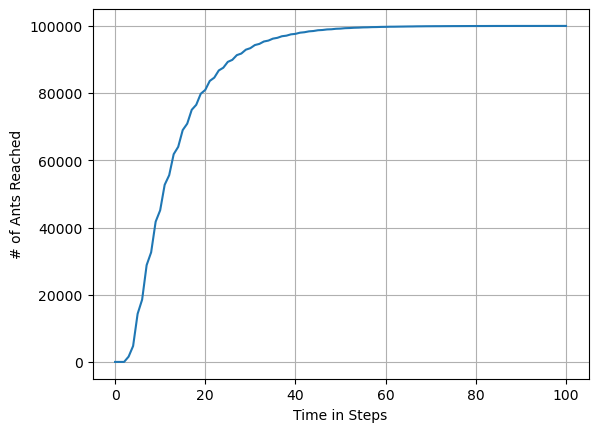

In [9]:
plt.plot(ants.ants_reached);
plt.xlabel('Time in Steps')
plt.ylabel('# of Ants Reached')
plt.grid()
plt.show()

# Conclusion
When we only take 100 steps, it is clear that with only the first and last question, all the ants reach the food. However, I find the behaviour of the graphs quite interesting, as the ants in the second question initially find the food much faster than the other two, but then it plateaus around 90-95%

All in all, this was a fun exercise and I sincerely hope you consider me for the position. Either way, thank you for going through my answer.